<h1 align=Left><font size = 5>Analysis on the best location to open a coffee cart business in Taipei, Taiwan</font></h1>

If you want to open up your own business, what's the first thing that comes to your mind? Here's some suggestions: build an electric car brand that has state-of-art autonomous driving and battery technology, and by the way make some rockets that can perform off-shore landing, E-A-S-Y. Well...you and I probably just realized that we're not Elon, but there's still hope! Unlike a lot of businesses that require deep expertise and/or enourmous capital to kickstart, opening a coffee cart business needs neither. It only takes as little as $2500 to start your own coffee cart business!
<br><br>
<a href="https://ferlabikes.com/ferla-mini"><img src = "https://ferlabikes.com/wp-content/uploads/2019/05/ferla_mini_gallery_01.jpg" width = 450> </a> 
<br><br>
To operate a successful coffee cart business, you'll need to know **where you're customers are at**. Coffee has become a necessity for people in the modern era, and this is more so the case for office workers that are sleep-deprived. In this notebook, I'll utilize the dataset containing <a href="https://data.nat.gov.tw/comment/539679">in and out of station passenger number of each MRT(Mass Rapid Transit) station in the greater Taipei area</a>, and also the data from <a href="https://developer.foursquare.com/places">Foursqaure API calls</a> to **identify the best location(MRT station) to open a coffee cart business targeting office workers in Taipei, Taiwan**.

<h1 align=Left><font size = 3>First Part: Using the passenger flow data to cluster MRT stations</font></h1>

I acquired the MRT passenger dataset from <a href="http://163.29.157.32:8080/dataset/98d67c29-464a-4003-9f78-b1cbb89bff59">link</a>. The dataset I use is from November 2019 since the coronavirus hasn't affect the world at that time, and also there's no national holiday in November. The raw data is very messy so I preprocessed it in another notebook "MRT data preprocessing". Go check out if you're interested!. 

I got 2 dataset out of the preprocessing, namely **MRT_df_instation** and **MRT_df_outstation**. Both record the passenger number from each MRT station in a particular weekly hour(Monday 11 PM will be 23, and Wednesday 10 AM will be 48+10=58, ...etc). The only difference between these 2 datasets are that one records the number of passengers **entering** each station, while the other records the number of passengers **exiting** each station.

In [1]:
import pandas as pd
MRT_df_instation = pd.read_csv('MRT_df_instation.csv', index_col = 0)
MRT_df_outstation = pd.read_csv('MRT_df_outstation.csv', index_col = 0)

In [2]:
MRT_df_instation.head(5)

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
in_station,,,,,,,,,,,,,,,,,,,,,
BL01,36.0,0.0,0.0,0.0,0.0,0.0,1342.0,4392.0,7947.0,3479.0,...,1822.0,1618.0,1769.0,2133.0,1908.0,1211.0,857.0,517.0,331.0,193.0
BL02,84.0,0.0,0.0,0.0,0.0,0.0,1471.0,6043.0,10133.0,7248.0,...,3229.0,2771.0,2961.0,3471.0,3323.0,2473.0,2292.0,2050.0,1146.0,567.0
BL03,54.0,2.0,0.0,0.0,0.0,0.0,996.0,3906.0,6726.0,3398.0,...,1962.0,1540.0,1446.0,1721.0,1315.0,931.0,750.0,580.0,374.0,220.0
BL04,193.0,3.0,0.0,0.0,0.0,0.0,3081.0,11823.0,22256.0,10325.0,...,5485.0,4155.0,3690.0,4498.0,3872.0,2819.0,2115.0,1574.0,1078.0,570.0
BL05,216.0,6.0,0.0,0.0,0.0,3.0,3054.0,12898.0,23064.0,11397.0,...,4770.0,4246.0,4072.0,4991.0,3545.0,2354.0,2019.0,1594.0,1189.0,609.0


In [3]:
MRT_df_instation.shape

(108, 168)

In [4]:
MRT_df_outstation.head(5)

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
out_station,,,,,,,,,,,,,,,,,,,,,
BL01,434.0,24.0,0.0,0.0,0.0,0.0,645.0,4587.0,4021.0,956.0,...,1595.0,1649.0,1957.0,2300.0,2624.0,2132.0,2559.0,2338.0,2117.0,1238.0
BL02,259.0,17.0,0.0,0.0,0.0,0.0,1333.0,3156.0,3862.0,2159.0,...,2541.0,3084.0,3288.0,4692.0,4016.0,4305.0,3786.0,3419.0,2710.0,1483.0
BL03,339.0,25.0,0.0,0.0,0.0,0.0,440.0,1536.0,1412.0,781.0,...,1458.0,1456.0,1793.0,2379.0,2294.0,1995.0,1840.0,1949.0,1760.0,844.0
BL04,970.0,55.0,0.0,0.0,0.0,0.0,1181.0,5065.0,3211.0,1937.0,...,3716.0,3885.0,5746.0,6995.0,7514.0,5918.0,6260.0,6294.0,5855.0,2664.0
BL05,729.0,16.0,0.0,0.0,0.0,3.0,1364.0,5158.0,6949.0,6100.0,...,3411.0,3808.0,4420.0,5667.0,5822.0,5143.0,4780.0,4960.0,4243.0,1935.0


In [5]:
MRT_df_outstation.shape

(108, 168)

We can see that there are 168 columns coresponding to 168 weekly hours, and 108 stations by the number of the rows. The weekly hour starts from Monday with column 0 corresponds to Monday 12AM(start of the day). With this understanding, we can proceed to visualizing the datasets!

The data structure is not fit for creating line plot, we need to transpose them first.

In [6]:
MRT_df_instation_T = MRT_df_instation.transpose()
MRT_df_outstation_T = MRT_df_outstation.transpose()

We first look at data from a station called Xihu, which has the station code of **BR16**. It's the closest MRT station to the largest technology based industrial park in Taipei. So naturally there will be a lot of office workers.
<br>
<br>
<a href="https://goo.gl/maps/YGCamoZ5MRtZ3uEW8"><img src = "https://www.techlife.com.tw/webimages/images/2019011514100079.JPG" width = 450> </a> 
<br>

Text(12, 32000, 'Workers')

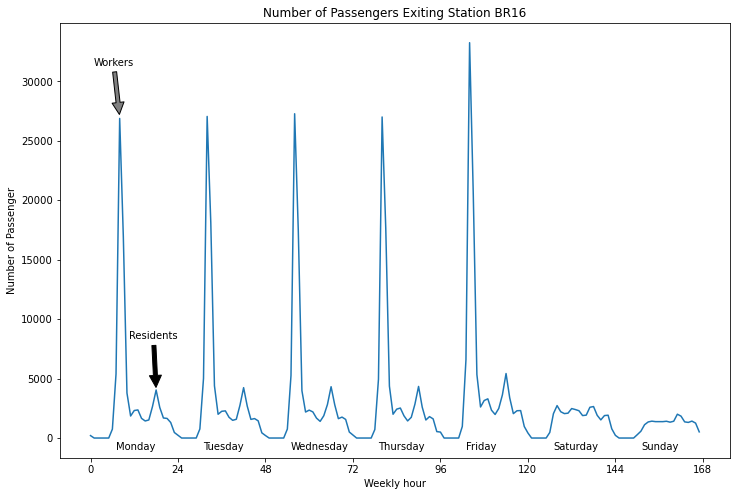

In [7]:
import matplotlib.pyplot as plt

lines = MRT_df_outstation_T['BR16'].plot(kind = 'line', figsize = (12, 8))
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168], ['0', '24', '48', '72', '96', '120', '144', '168'])
plt.title('Number of Passengers Exiting Station BR16')
plt.ylabel('Number of Passenger')
plt.xlabel('Weekly hour')
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i in range(len(week)):
    plt.annotate(week[i], xy =(7 + 24*i, -1000))
    
lines.annotate('Residents', xy = (18, 4050), xytext =(24, 9000), arrowprops = dict(facecolor = 'black', shrink = 0.05), 
               horizontalalignment = 'right', verticalalignment = 'top')
lines.annotate('Workers', xy = (8, 27000), xytext = (12, 32000), arrowprops = dict(facecolor='gray', shrink = 0.05), 
               horizontalalignment = 'right', verticalalignment = 'top')

This line plot represents the number of passengers **exiting** BR16 each weekly hour. We can see that there are 2 peaks in each weekday with a big one in the morning likely due to workers exiting the station to their office, and a small one in the afternoon/evening representing the residents returning to their home. Furthermore, the passenger number in the weekend sharply decreases.

Now let's also look at the line plot presenting number of passengers **entering** BR16.

Text(24, 22000, 'Workers')

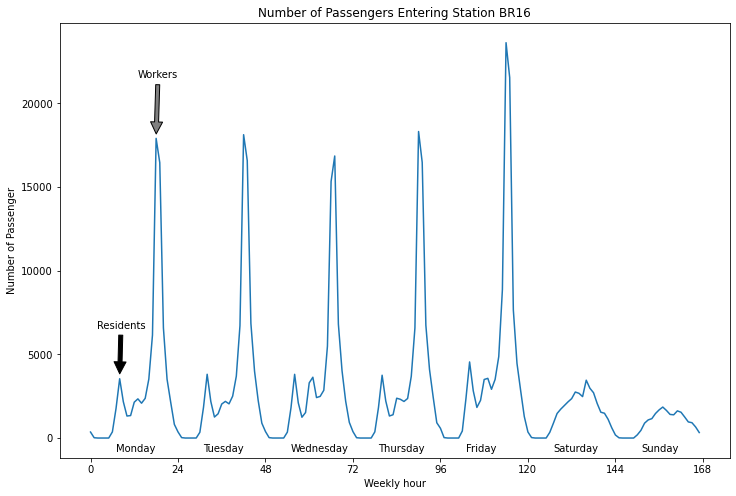

In [8]:
lines = MRT_df_instation_T['BR16'].plot(kind = 'line', figsize = (12, 8))
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168], ['0', '24', '48', '72', '96', '120', '144', '168'])
plt.title('Number of Passengers Entering Station BR16')
plt.ylabel('Number of Passenger')
plt.xlabel('Weekly hour')
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i in range(len(week)):
    plt.annotate(week[i], xy =(7 + 24*i, -800))

lines.annotate('Residents', xy = (8, 3700), xytext =(15, 7000), arrowprops = dict(facecolor = 'black', shrink = 0.05), 
               horizontalalignment = 'right', verticalalignment = 'top')
lines.annotate('Workers', xy = (18, 18000), xytext = (24, 22000), arrowprops = dict(facecolor='gray', shrink = 0.05), 
               horizontalalignment = 'right', verticalalignment = 'top')

From the line plot presenting number of passengers entering BR16 we can see that it mirrors the previous graph during weekdays with a small peak in the morning and a big peak in the evening.

**Next, let's utilize k-means clustering to find stations with the same passenger flow profile as BR16** in order to find potential locations for the coffee cart business.

Either dataset representing passensger entering or exiting station could be used to perform the clustering. Still, combining the 2 datasets together would give additional clustering power. To do that, I'll need to first **change the column names**(since the column names of both datasets are the same), **normalize the passenger number** to make different stations comparable(the passenger numbers varies by a lot), and then **concatenate the 2 datasets**.

In [9]:
MRT_df_instation_forcombine = MRT_df_instation
MRT_df_outstation_forcombine = MRT_df_outstation

for i in range(MRT_df_outstation.shape[1]):
    hour = MRT_df_outstation.columns[i]
    MRT_df_outstation_forcombine = MRT_df_outstation_forcombine.rename(columns = { hour : "out_" + str(hour)})
    MRT_df_instation_forcombine = MRT_df_instation_forcombine.rename(columns = { hour : "in_" + str(hour)})

In [10]:
MRT_df_instation_forcombine.head(5)

,in_0,in_1,in_2,in_3,in_4,in_5,in_6,in_7,in_8,in_9,...,in_158,in_159,in_160,in_161,in_162,in_163,in_164,in_165,in_166,in_167
in_station,,,,,,,,,,,,,,,,,,,,,
BL01,36.0,0.0,0.0,0.0,0.0,0.0,1342.0,4392.0,7947.0,3479.0,...,1822.0,1618.0,1769.0,2133.0,1908.0,1211.0,857.0,517.0,331.0,193.0
BL02,84.0,0.0,0.0,0.0,0.0,0.0,1471.0,6043.0,10133.0,7248.0,...,3229.0,2771.0,2961.0,3471.0,3323.0,2473.0,2292.0,2050.0,1146.0,567.0
BL03,54.0,2.0,0.0,0.0,0.0,0.0,996.0,3906.0,6726.0,3398.0,...,1962.0,1540.0,1446.0,1721.0,1315.0,931.0,750.0,580.0,374.0,220.0
BL04,193.0,3.0,0.0,0.0,0.0,0.0,3081.0,11823.0,22256.0,10325.0,...,5485.0,4155.0,3690.0,4498.0,3872.0,2819.0,2115.0,1574.0,1078.0,570.0
BL05,216.0,6.0,0.0,0.0,0.0,3.0,3054.0,12898.0,23064.0,11397.0,...,4770.0,4246.0,4072.0,4991.0,3545.0,2354.0,2019.0,1594.0,1189.0,609.0


In [11]:
MRT_df_outstation_forcombine.head(5)

,out_0,out_1,out_2,out_3,out_4,out_5,out_6,out_7,out_8,out_9,...,out_158,out_159,out_160,out_161,out_162,out_163,out_164,out_165,out_166,out_167
out_station,,,,,,,,,,,,,,,,,,,,,
BL01,434.0,24.0,0.0,0.0,0.0,0.0,645.0,4587.0,4021.0,956.0,...,1595.0,1649.0,1957.0,2300.0,2624.0,2132.0,2559.0,2338.0,2117.0,1238.0
BL02,259.0,17.0,0.0,0.0,0.0,0.0,1333.0,3156.0,3862.0,2159.0,...,2541.0,3084.0,3288.0,4692.0,4016.0,4305.0,3786.0,3419.0,2710.0,1483.0
BL03,339.0,25.0,0.0,0.0,0.0,0.0,440.0,1536.0,1412.0,781.0,...,1458.0,1456.0,1793.0,2379.0,2294.0,1995.0,1840.0,1949.0,1760.0,844.0
BL04,970.0,55.0,0.0,0.0,0.0,0.0,1181.0,5065.0,3211.0,1937.0,...,3716.0,3885.0,5746.0,6995.0,7514.0,5918.0,6260.0,6294.0,5855.0,2664.0
BL05,729.0,16.0,0.0,0.0,0.0,3.0,1364.0,5158.0,6949.0,6100.0,...,3411.0,3808.0,4420.0,5667.0,5822.0,5143.0,4780.0,4960.0,4243.0,1935.0


In [12]:
MRT_df_instation_forcombine_norm = MRT_df_instation_forcombine.div(MRT_df_outstation_forcombine.sum(axis=1), axis=0)
MRT_df_outstation_forcombine_norm = MRT_df_outstation_forcombine.div(MRT_df_outstation_forcombine.sum(axis=1), axis=0)

In [13]:
MRT_df_instation_forcombine_norm.head(5)

,in_0,in_1,in_2,in_3,in_4,in_5,in_6,in_7,in_8,in_9,...,in_158,in_159,in_160,in_161,in_162,in_163,in_164,in_165,in_166,in_167
in_station,,,,,,,,,,,,,,,,,,,,,
BL01,0.000140,0.000000,0.0,0.0,0.0,0.000000,0.005202,0.017023,0.030802,0.013484,...,0.007062,0.006271,0.006857,0.008267,0.007395,0.004694,0.003322,0.002004,0.001283,0.000748
BL02,0.000194,0.000000,0.0,0.0,0.0,0.000000,0.003394,0.013944,0.023382,0.016725,...,0.007451,0.006394,0.006833,0.008009,0.007668,0.005707,0.005289,0.004730,0.002644,0.001308
BL03,0.000237,0.000009,0.0,0.0,0.0,0.000000,0.004376,0.017163,0.029554,0.014931,...,0.008621,0.006767,0.006354,0.007562,0.005778,0.004091,0.003295,0.002548,0.001643,0.000967
BL04,0.000284,0.000004,0.0,0.0,0.0,0.000000,0.004529,0.017379,0.032714,0.015177,...,0.008062,0.006107,0.005424,0.006612,0.005691,0.004144,0.003109,0.002314,0.001585,0.000838
BL05,0.000305,0.000008,0.0,0.0,0.0,0.000004,0.004308,0.018192,0.032531,0.016075,...,0.006728,0.005989,0.005743,0.007040,0.005000,0.003320,0.002848,0.002248,0.001677,0.000859


In [14]:
MRT_df_outstation_forcombine_norm.head(5)

,out_0,out_1,out_2,out_3,out_4,out_5,out_6,out_7,out_8,out_9,...,out_158,out_159,out_160,out_161,out_162,out_163,out_164,out_165,out_166,out_167
out_station,,,,,,,,,,,,,,,,,,,,,
BL01,0.001682,0.000093,0.0,0.0,0.0,0.000000,0.002500,0.017779,0.015585,0.003705,...,0.006182,0.006391,0.007585,0.008915,0.010171,0.008264,0.009919,0.009062,0.008205,0.004798
BL02,0.000598,0.000039,0.0,0.0,0.0,0.000000,0.003076,0.007283,0.008912,0.004982,...,0.005863,0.007116,0.007587,0.010827,0.009267,0.009934,0.008736,0.007889,0.006253,0.003422
BL03,0.001490,0.000110,0.0,0.0,0.0,0.000000,0.001933,0.006749,0.006204,0.003432,...,0.006406,0.006398,0.007878,0.010453,0.010080,0.008766,0.008085,0.008564,0.007733,0.003708
BL04,0.001426,0.000081,0.0,0.0,0.0,0.000000,0.001736,0.007445,0.004720,0.002847,...,0.005462,0.005711,0.008446,0.010282,0.011045,0.008699,0.009202,0.009252,0.008606,0.003916
BL05,0.001028,0.000023,0.0,0.0,0.0,0.000004,0.001924,0.007275,0.009801,0.008604,...,0.004811,0.005371,0.006234,0.007993,0.008212,0.007254,0.006742,0.006996,0.005985,0.002729


In [15]:
MRT_df_for_kmeans = pd.concat([MRT_df_instation_forcombine_norm, MRT_df_outstation_forcombine_norm], axis = 1, join = 'inner')
MRT_df_for_kmeans.head(5)

,in_0,in_1,in_2,in_3,in_4,in_5,in_6,in_7,in_8,in_9,...,out_158,out_159,out_160,out_161,out_162,out_163,out_164,out_165,out_166,out_167
BL01,0.000140,0.000000,0.0,0.0,0.0,0.000000,0.005202,0.017023,0.030802,0.013484,...,0.006182,0.006391,0.007585,0.008915,0.010171,0.008264,0.009919,0.009062,0.008205,0.004798
BL02,0.000194,0.000000,0.0,0.0,0.0,0.000000,0.003394,0.013944,0.023382,0.016725,...,0.005863,0.007116,0.007587,0.010827,0.009267,0.009934,0.008736,0.007889,0.006253,0.003422
BL03,0.000237,0.000009,0.0,0.0,0.0,0.000000,0.004376,0.017163,0.029554,0.014931,...,0.006406,0.006398,0.007878,0.010453,0.010080,0.008766,0.008085,0.008564,0.007733,0.003708
BL04,0.000284,0.000004,0.0,0.0,0.0,0.000000,0.004529,0.017379,0.032714,0.015177,...,0.005462,0.005711,0.008446,0.010282,0.011045,0.008699,0.009202,0.009252,0.008606,0.003916
BL05,0.000305,0.000008,0.0,0.0,0.0,0.000004,0.004308,0.018192,0.032531,0.016075,...,0.004811,0.005371,0.006234,0.007993,0.008212,0.007254,0.006742,0.006996,0.005985,0.002729


In [16]:
MRT_df_for_kmeans.shape

(108, 336)

The concatenated dataset is now ready for clustering!!

Let's first standardize the data by row to have a mean of 0 and a variance of 1.

In [17]:
from sklearn.preprocessing import StandardScaler
MRT_df_for_kmeans_std = StandardScaler().fit_transform(MRT_df_for_kmeans)
MRT_df_for_kmeans_std

array([[-1.26712154, -1.0807632 ,  0.        , ...,  1.36888453,
         1.5938783 ,  2.31414991],
       [-1.08796906, -1.0807632 ,  0.        , ...,  0.81243949,
         0.63005598,  1.02911094],
       [-0.94464037, -0.36239651,  0.        , ...,  1.13246384,
         1.36079507,  1.29652852],
       ...,
       [-0.6629112 , -0.00419591,  0.        , ...,  0.58553505,
         0.59540431,  1.21857042],
       [-0.79280998,  0.08881172,  0.        , ...,  1.19934832,
         1.54796116,  1.87631077],
       [-0.69779656, -0.44297335,  0.        , ...,  0.64554923,
         0.57592881,  1.02875909]])

I utilized the elbow method to examine what number of k is optimal. The elbow point represents a diminishing return (on clustering power) with an increase of k.

In [18]:
from sklearn.cluster import KMeans
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(MRT_df_for_kmeans_std)
    sum_of_squared_distances.append(km.inertia_)

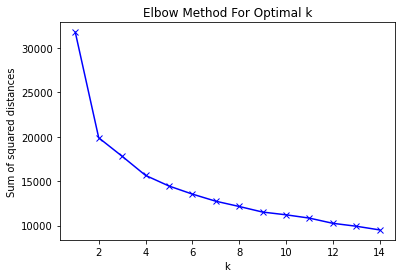

In [19]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

It seems like the best k is 2. But from my own understanding of Taipei, it will only roughly distinguish "mostly commercial" and "mostly residential" areas/stations. So I'll use the next elbow point.

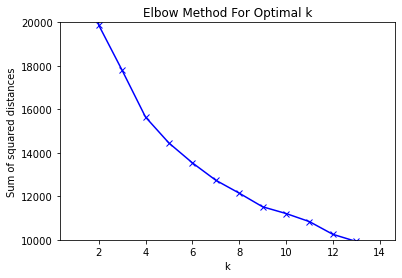

In [20]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.ylim((10000,20000))
plt.show()

Even if enlarged, it really doesn't seem that there's a good choice. But I'll go with k = 4 since that's the next visible elbow point other than k = 2.

The next step is to **fit the dataset for k-means clustering** and **identify the cluster that BR16 belongs to**.

In [21]:
kclusters = 4
kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(MRT_df_for_kmeans_std)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 3, 3, 3, 0, 0, 0, 0, 3, 0, 1, 0,
       1, 1, 0, 0, 2, 3, 2, 0, 3, 0, 3, 2, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1,
       1, 0, 0, 0, 1, 3, 0, 0, 2, 3, 3, 2, 2, 2, 0, 1, 1, 1, 1, 3, 2, 0,
       0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 1, 0, 0, 3, 1, 2, 0, 1, 1, 0])

In [22]:
MRT_df_for_kmeans.insert(0, 'cluster_labels', kmeans.labels_)

In [23]:
MRT_df_for_kmeans.at['BR16', 'cluster_labels']

2

In [24]:
MRT_cluster2_df = MRT_df_for_kmeans.loc[MRT_df_for_kmeans['cluster_labels'] == 2]
MRT_cluster2_df.shape

(15, 337)

From the result we see **BR16 belongs to cluster 2**, and 14 other stations have similar traits. Let's visualize the passenger flow of these 15 stations together.

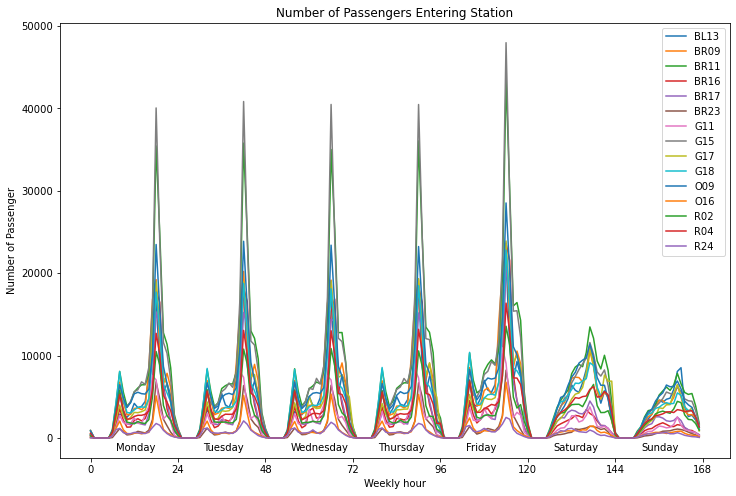

In [25]:
for i in MRT_cluster2_df.index:
    lines = MRT_df_instation_T[i].plot(kind='line', figsize=(12, 8))

plt.title('Number of Passengers Entering Station')
plt.ylabel('Number of Passenger')
plt.xlabel('Weekly hour')
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168], ['0', '24', '48', '72', '96', '120', '144', '168'])
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i in range(len(week)):
    plt.annotate(week[i], xy =(7 + 24*i, -1500))
plt.legend()
plt.show()

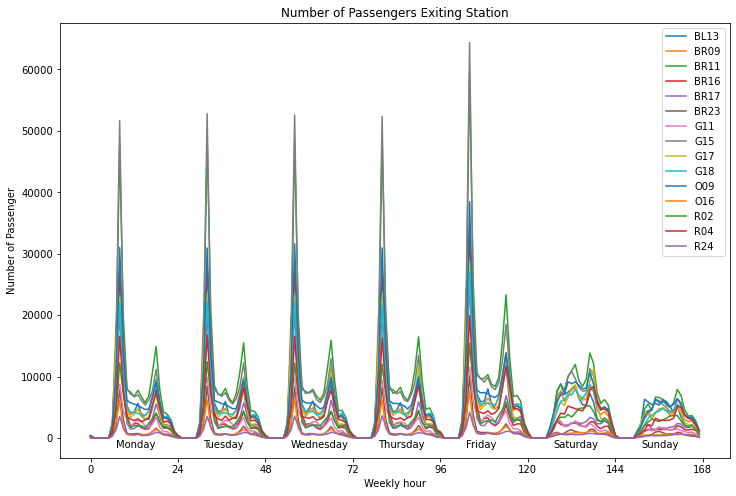

In [26]:
for i in MRT_cluster2_df.index:
    lines = MRT_df_outstation_T[i].plot(kind='line', figsize=(12, 8))

plt.title('Number of Passengers Exiting Station')
plt.ylabel('Number of Passenger')
plt.xlabel('Weekly hour')
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168], ['0', '24', '48', '72', '96', '120', '144', '168'])
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i in range(len(week)):
    plt.annotate(week[i], xy =(7 + 24*i, -1500))
plt.legend()
plt.show()

From the 2 graphs above we can see that all 15 stations indeed have similar profile with the big peak likely representing the activity of office workers on weekdays.

The next step is to locate these stations on the map since this can help us better understand the characteristics of these stations. The latitute and the longitude of each station is needed for visualization on the map so I import the data from https://raw.githubusercontent.com/repeat/northern-taiwan-metro-stations/master/northern-taiwan.csv. This dataset has the geolocation of all stations. I'll also create a dataframe called **MRT_cluster2_geoloc which contains only the stations in cluster 2**.

In [27]:
MRT_geoloc = pd.read_csv('https://raw.githubusercontent.com/repeat/northern-taiwan-metro-stations/master/northern-taiwan.csv')
MRT_geoloc.head(5)

,station_code,construction_id,station_name_tw,station_name_en,line_code,line_name,address,lat,lon
0,BR01,BR13,動物園,Taipei Zoo,BR,文湖線,台北市文山區新光路二段32號,24.998197,121.579338
1,BR02,BR12,木柵,Muzha,BR,文湖線,台北市文山區木柵路四段135號,24.998241,121.573145
2,BR03,BR11,萬芳社區,Wanfang Community,BR,文湖線,台北市文山區萬芳路60號,24.998585,121.568102
3,BR04,BR10,萬芳醫院,Wanfang Hospital,BR,文湖線,台北市文山區興隆路三段113號,24.999386,121.558152
4,BR05,BR9,辛亥,Xinhai,BR,文湖線,台北市文山區辛亥路四段128號,25.005475,121.557107


In [28]:
MRT_cluster2_geoloc = MRT_geoloc.loc[MRT_geoloc['station_code'].isin(MRT_cluster2_df.index)]
MRT_cluster2_geoloc

,station_code,construction_id,station_name_tw,station_name_en,line_code,line_name,address,lat,lon
8,BR09,BR5,大安,Daan,BR,文湖線,台北市大安區信義路四段2號,25.032943,121.543551
10,BR11,BR3,南京復興,Nanjing Fuxing,BR,文湖線,台北市松山區南京東路三段253號,25.052319,121.544011
15,BR16,B3,西湖,Xihu,BR,文湖線,台北市內湖區內湖路一段256號,25.082133,121.567213
16,BR17,B4,港墘,Gangqian,BR,文湖線,台北市內湖區內湖路一段663號,25.080028,121.575081
22,BR23,B10,南港軟體園區,Nangang Software Park,BR,文湖線,台北市南港區經貿二路183號,25.059905,121.615953
24,R02,R5,象山,Xiangshan,R,淡水信義線,台北市信義區信義路五段152號B1,25.032830,121.569576
26,R04,R7,信義安和,Xinyi Anhe,R,淡水信義線,台北市大安區信義路四段212之1號B1,25.033326,121.553526
47,R24,R29,忠義,Zhongyi,R,淡水信義線,台北市北投區中央北路四段301號,25.130969,121.473410
63,G11,G12,小南門,Xiaonanmen,G,松山新店線,台北市中正區愛國西路22號B1,25.035547,121.510857
67,G15,G17,松江南京,Songjiang Nanjing,G,松山新店線,台北市中山區松江路126號B1,25.052015,121.533075


In [29]:
import folium
from folium.features import DivIcon

map_Taipei = folium.Map(location = [25.052015, 121.533075], zoom_start=12)

for lat, lon, station_code in zip(MRT_geoloc['lat'], MRT_geoloc['lon'], MRT_geoloc['station_code']):
    label = '{}'.format(station_code)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup = label,
        color = '',
        fill = True,
        fill_color = 'Black',
        fill_opacity = 0.8,
        parse_html = False).add_to(map_Taipei) 

for lat, lon, station_code in zip(MRT_cluster2_geoloc['lat'], MRT_cluster2_geoloc['lon'], MRT_cluster2_geoloc['station_code']):
    label = '{}'.format(station_code)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius = 7,
        popup = label,
        color = 'Gray',
        fill = True,
        fill_color = 'Yellow',
        fill_opacity = 0.9,
        parse_html = False).add_to(map_Taipei) 

folium.Marker([25.052015, 121.533075], icon=DivIcon(
        icon_size = (150, 36),
        icon_anchor = (-8, 28),
        html = '<div style="font-size: 15pt; color : Navy">Downtown</div>',
        )).add_to(map_Taipei)
map_Taipei.add_child(folium.CircleMarker([25.050356, 121.549767], radius = 90, color = 'Navy'))

folium.Marker([25.082133, 121.567213], icon = DivIcon(
        icon_size = (150,36),
        icon_anchor = (15,23),
        html = '<div style="font-size: 10pt; color : Brown">BR16</div>',
        )).add_to(map_Taipei)
map_Taipei

The **yellow dots are the locations of the stations in cluster 2**. Most of these stations are in the downtown area. Others are usually in proximity with industrial parks located in the suburbs.

<h1 align=Left><font size = 3>Second Part: Utilize the Foursquare API calls to find the best candidate station for a coffee cart business</font></h1>

Now I have 15 potential candidates from cluster 2, and the next step is to further narrow it down. I plan to investigate **the correlation between passenger and coffee shop numbers** in each station in order to find locations with hign ratio of passenger to coffee shop number.

First, I'll get rid of the columns that aren't needed in MRT_target_list. I'll also insert 2 new columns representing the number of passengers and coffee shops respectively.

In [30]:
MRT_cluster2_geoloc_numbers = MRT_cluster2_geoloc.drop(axis = 1, columns = ['construction_id', 'station_name_tw', 'station_name_en', 'line_code', 'line_name', 'address'])
MRT_cluster2_geoloc_numbers.insert(3 , column = 'total_passenger_num', value = float(0.0), allow_duplicates = False)
MRT_cluster2_geoloc_numbers.insert(4 , column = 'coffee_shop_num', value = int(0), allow_duplicates = False)
MRT_cluster2_geoloc_numbers = MRT_cluster2_geoloc_numbers.set_index('station_code')
MRT_cluster2_geoloc_numbers.head(5)

,lat,lon,total_passenger_num,coffee_shop_num
station_code,,,,
BR09,25.032943,121.543551,0.0,0
BR11,25.052319,121.544011,0.0,0
BR16,25.082133,121.567213,0.0,0
BR17,25.080028,121.575081,0.0,0
BR23,25.059905,121.615953,0.0,0


I calculate the total(monthly) passenger number by adding hourly passenger numbers together in each station.

In [31]:
for i in MRT_cluster2_geoloc_numbers.index:
    total_passenger_num = 0
    for days in range(7):
        for hours in range(24):
            total_passenger_num = total_passenger_num + MRT_df_outstation.at[i, str(0 + hours + 24*days)]
    MRT_cluster2_geoloc_numbers.loc[MRT_cluster2_geoloc_numbers.index == i, 'total_passenger_num'] = total_passenger_num

In [32]:
MRT_cluster2_geoloc_numbers.head(5)

,lat,lon,total_passenger_num,coffee_shop_num
station_code,,,,
BR09,25.032943,121.543551,779779.0,0
BR11,25.052319,121.544011,1218451.0,0
BR16,25.082133,121.567213,487722.0,0
BR17,25.080028,121.575081,463220.0,0
BR23,25.059905,121.615953,150612.0,0


I use the foursquare API call to get the **number of coffee shops** by searching only the venues that are in the 'coffee shop' category. I set the radius of search to 300 meters(~1000 feet), and the limit 50 is dictated by Foursquare.

Let's examine the coffee shops near BR16 first.

In [33]:
import requests
import json

CLIENT_ID = 'DIQ2YCTZNG2ARVZYMFIMQLCDO5LOSIL4ECL5PILZBGB3F2WB'
CLIENT_SECRET = '5QFVVGBI4RTJ1FUPDTB1TLNYRXYN0DEHRVUCRRCOTRK3GUAY'
VERSION = '20191131'
LIMIT = 50
radius = 300
latitude = 25.082133
longitude = 121.567213
categoryId = '4bf58dd8d48988d1e0931735' # the Id of 'Coffee shop'

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&categoryId={}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, categoryId, VERSION, radius, LIMIT)
results = requests.get(url).json()
items = results['response']['venues']
dataframe = pd.json_normalize(items)
dataframe

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.country,location.formattedAddress,location.postalCode,location.state
0,4c045b6d39d476b0786f31a7,星巴克,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1607592041,False,內湖路一段289號,25.082163,121.567104,"[{'label': 'display', 'lat': 25.08216279124703...",11,TW,台北市,臺灣,"[內湖路一段289號, 台北市, 臺灣]",NaN,NaN
1,54defd2a498e9d4d76eac896,Coffee Angel,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1607592041,False,內湖路一段293號,25.082078,121.567246,"[{'label': 'display', 'lat': 25.082078, 'lng':...",6,TW,內湖區,臺灣,"[內湖路一段293號, 內湖區, 臺北市 114, 臺灣]",114,臺北市
2,5c10a1dad552c7002c9cea44,Komeda’s Coffee (客美多咖啡),"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1607592041,False,基湖路1之2號,25.081426,121.565451,"[{'label': 'display', 'lat': 25.081426, 'lng':...",194,TW,內湖區,臺灣,"[基湖路1之2號, 內湖區, 臺北市 11492, 臺灣]",11492,臺北市
3,5a2f9b934382ab3b437c6452,Miracle Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1607592041,False,洲子街151號,25.081206,121.568440,"[{'label': 'display', 'lat': 25.081206, 'lng':...",161,TW,內湖區,臺灣,"[洲子街151號, 內湖區, 臺北市 114, 臺灣]",114,臺北市
4,57d27eeb498ec7f2c3854351,路易．莎咖啡 LOUISA COFFEE 內湖285店,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1607592041,False,內湖路一段285巷27弄1號,25.083212,121.566923,"[{'label': 'display', 'lat': 25.083212, 'lng':...",123,TW,內湖區,臺灣,"[內湖路一段285巷27弄1號, 內湖區, 臺北市 114, 臺灣]",114,臺北市
5,51d3fb28498e71c82d506221,西雅圖極品咖啡 Barista Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1607592041,False,NaN,25.082239,121.566025,"[{'label': 'display', 'lat': 25.08223880513505...",120,TW,台北市,臺灣,"[台北市, 臺灣]",NaN,NaN
6,536220f4498ead277d9f0349,Mountain Cafe,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1607592041,False,台北市內湖路一段312號,25.080971,121.569287,"[{'label': 'display', 'lat': 25.080971, 'lng':...",245,TW,台北市,臺灣,"[台北市內湖路一段312號, 台北市, 臺灣]",NaN,NaN
7,4e681f2faeb75ce77484a349,星巴克,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1607592041,False,基湖路25號,25.080390,121.564862,"[{'label': 'display', 'lat': 25.08038971437053...",306,TW,台北市,臺灣,"[基湖路25號, 台北市, 臺灣]",NaN,NaN
8,4ca2e877d7c3370459709c62,cama 現烘咖啡專門店,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1607592041,False,內湖路一段293號,25.082071,121.567385,"[{'label': 'display', 'lat': 25.08207146226521...",18,TW,內湖區,臺灣,"[內湖路一段293號, 內湖區, 臺北市, 臺灣]",NaN,臺北市
9,5cf86643535d6f002c0b32e2,Uno Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1607592041,False,NaN,25.082069,121.567274,"[{'label': 'display', 'lat': 25.082069, 'lng':...",9,TW,內湖區,臺灣,"[內湖區, 臺北市 11493, 臺灣]",11493,臺北市


We can see that there are 21 coffee shops in the 300 meter radius of BR16. Let's go on to **get the number of coffee shops in all station of cluster 2 and insert this information into the dataframe**.

In [34]:
for i in MRT_cluster2_geoloc_numbers.index:
    latitude = MRT_cluster2_geoloc_numbers.at[i, 'lat']
    longitude = MRT_cluster2_geoloc_numbers.at[i, 'lon']
    categoryId = '4bf58dd8d48988d1e0931735' 
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&categoryId={}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, categoryId, VERSION, radius, LIMIT)
    results = requests.get(url).json()
    items = results['response']['venues']
    dataframe = pd.json_normalize(items) # flatten JSON
    MRT_cluster2_geoloc_numbers.loc[MRT_cluster2_geoloc_numbers.index == i, 'coffee_shop_num'] = dataframe.shape[0]

In [35]:
MRT_cluster2_geoloc_numbers.head(5)

,lat,lon,total_passenger_num,coffee_shop_num
station_code,,,,
BR09,25.032943,121.543551,779779.0,22
BR11,25.052319,121.544011,1218451.0,43
BR16,25.082133,121.567213,487722.0,22
BR17,25.080028,121.575081,463220.0,6
BR23,25.059905,121.615953,150612.0,8


Now we get a dataset of the 15 stations with the geolocation and the number of passengers and coffee shops.

We can visualize the correlation between number of passenger and coffee shop by a scatterplot or regplot.

([<matplotlib.axis.XTick at 0x1b74337fca0>,
 [Text(0, 0, '200000'),
  Text(0, 0, '400000'),
  Text(0, 0, '600000'),
  Text(0, 0, '800000'),
  Text(0, 0, '1000000'),
  Text(0, 0, '1200000')])

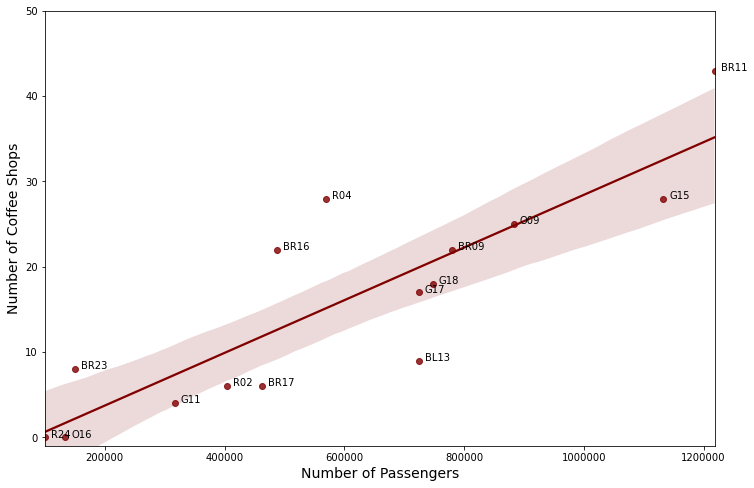

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

total_passenger_num = MRT_cluster2_geoloc_numbers.total_passenger_num.tolist()
coffee_shop_num = MRT_cluster2_geoloc_numbers.coffee_shop_num.tolist()
Index = MRT_cluster2_geoloc_numbers.index.tolist()

plt.figure(figsize = (12, 8))
p1 = sns.regplot(x = 'total_passenger_num', y = 'coffee_shop_num', data = MRT_cluster2_geoloc_numbers, color = 'maroon')
for line in range(0, MRT_cluster2_geoloc_numbers.shape[0]):
    p1.text(total_passenger_num[line] + 10000, coffee_shop_num[line], Index[line],
            horizontalalignment = 'left',size = 'medium',color = 'black')
plt.ylabel('Number of Coffee Shops', size = 14)
plt.xlabel('Number of Passengers', size = 14)
plt.ylim([-1, 50])
plt.xticks([200000, 400000, 600000, 800000, 1000000, 1200000], ['200000', '400000', '600000', '800000', '1000000', '1200000'])

From this scatterplot we can see that there seems to be a positive linear correlation between the number of passengers and coffee shops. To examine this correlation, we'll calculate the R-squared value.

In [37]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(total_passenger_num, coffee_shop_num)
print(r_value**2)

0.7344244244404414


The R-squared value is over 0.7 which is considered highly correlated.

Let's also create the same dataframe for the other 3 clusters to compare to cluster 2.

In [38]:
MRT_clusterX_geoloc_numbers = MRT_geoloc.loc[MRT_geoloc['station_code'].isin(MRT_df_for_kmeans.index)]
MRT_clusterX_geoloc_numbers = MRT_clusterX_geoloc_numbers.drop(axis = 1, columns = ['construction_id', 'station_name_tw', 'station_name_en', 'line_code', 'line_name', 'address'])
MRT_clusterX_geoloc_numbers.insert(3 , column = 'pot_cus_num', value = float(0.0), allow_duplicates = False)
MRT_clusterX_geoloc_numbers.insert(4 , column = 'total_passenger_num', value = int(0), allow_duplicates = False)
MRT_clusterX_geoloc_numbers = MRT_clusterX_geoloc_numbers.set_index('station_code')

for i in MRT_clusterX_geoloc_numbers.index:
    total_passenger_num = 0
    for days in range(7):
        for hours in range(24):
            total_passenger_num = total_passenger_num + MRT_df_outstation.at[i, str(0 + hours + 24*days)]
    MRT_clusterX_geoloc_numbers.loc[MRT_clusterX_geoloc_numbers.index == i, 'total_passenger_num'] = total_passenger_num

for i in MRT_clusterX_geoloc_numbers.index:
    latitude = MRT_clusterX_geoloc_numbers.at[i, 'lat']
    longitude = MRT_clusterX_geoloc_numbers.at[i, 'lon']
    categoryId = '4bf58dd8d48988d1e0931735' 
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&categoryId={}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, categoryId, VERSION, radius, LIMIT)
    results = requests.get(url).json()
    items = results['response']['venues']
    dataframe = pd.json_normalize(items)
    MRT_clusterX_geoloc_numbers.loc[MRT_clusterX_geoloc_numbers.index == i, 'coffee_shop_num'] = dataframe.shape[0]
        
MRT_cluster0_geoloc_numbers = MRT_clusterX_geoloc_numbers.loc[MRT_df_for_kmeans['cluster_labels'] == 0]
MRT_cluster1_geoloc_numbers = MRT_clusterX_geoloc_numbers.loc[MRT_df_for_kmeans['cluster_labels'] == 1]
MRT_cluster3_geoloc_numbers = MRT_clusterX_geoloc_numbers.loc[MRT_df_for_kmeans['cluster_labels'] == 3]

Text(1700000, 28, 'Cluster 3')

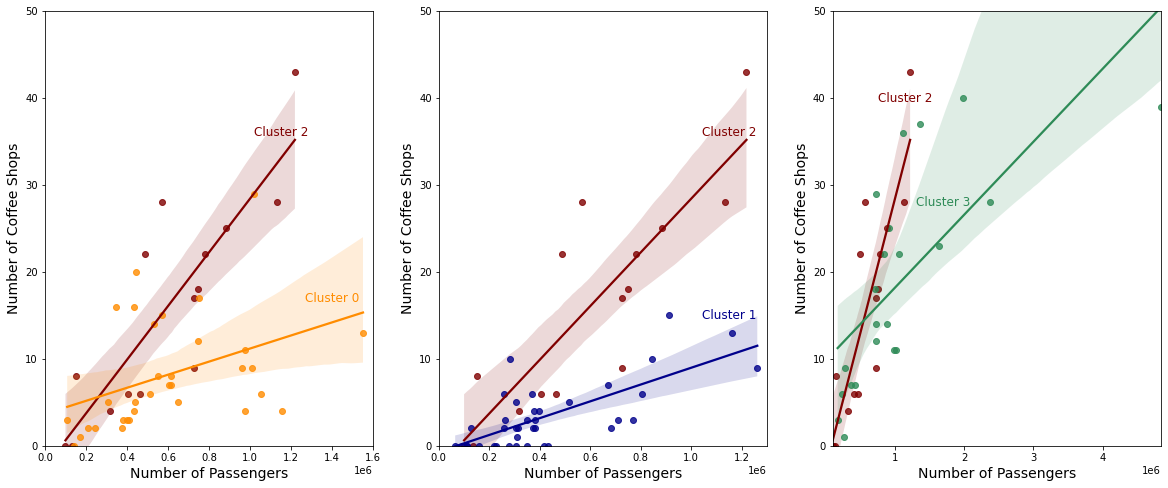

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(20, 8))

lm = sns.regplot(x = 'total_passenger_num', y = 'coffee_shop_num', data = MRT_cluster2_geoloc_numbers, ax = ax1, color = 'maroon')
lm = sns.regplot(x = 'total_passenger_num', y = 'coffee_shop_num', data = MRT_cluster0_geoloc_numbers, ax = ax1, color = 'darkorange')
ax1.set_xlim([0, 1600000])
ax1.set_ylim([0, 50])
ax1.set_ylabel('Number of Coffee Shops', size = 14)
ax1.set_xlabel('Number of Passengers', size = 14)
ax1.text(1150000, 36, 'Cluster 2', size=12, ha='center', va='center', color = 'maroon')
ax1.text(1400000, 17, 'Cluster 0', size=12, ha='center', va='center', color = 'darkorange')

lm = sns.regplot(x = 'total_passenger_num', y = 'coffee_shop_num', data = MRT_cluster2_geoloc_numbers, ax = ax2, color = 'maroon')
lm = sns.regplot(x = 'total_passenger_num', y = 'coffee_shop_num', data = MRT_cluster1_geoloc_numbers, ax = ax2, color = 'darkblue')
ax2.set_xlim([0, 1300000])
ax2.set_ylim([0, 50])
ax2.set_ylabel('Number of Coffee Shops', size = 14)
ax2.set_xlabel('Number of Passengers', size = 14)
ax2.text(1150000, 36, 'Cluster 2', size=12, ha='center', va='center', color = 'maroon')
ax2.text(1150000, 15, 'Cluster 1', size=12, ha='center', va='center', color = 'darkblue')

lm = sns.regplot(x = 'total_passenger_num', y = 'coffee_shop_num', data = MRT_cluster2_geoloc_numbers, ax = ax3, color = 'maroon')
lm = sns.regplot(x = 'total_passenger_num', y = 'coffee_shop_num', data = MRT_cluster3_geoloc_numbers, ax = ax3, color = 'seagreen')
ax3.set_ylim([0, 50])
ax3.set_ylabel('Number of Coffee Shops', size = 14)
ax3.set_xlabel('Number of Passengers', size = 14)
ax3.text(1150000, 40, 'Cluster 2', size=12, ha='center', va='center', color = 'maroon')
ax3.text(1700000, 28, 'Cluster 3', size=12, ha='center', va='center', color = 'seagreen')

From the figures above we can see that the **stations in cluster 2 generally have more coffee shops per monthly passengers compared to other clusters**, indicating a need of coffee from office workers. Cluster 3 seems to have more coffee shop per passenger compared to cluster 2 in stations with low passenger numbers, but this trend reverses in stations with higher number of passengers. This is likely because 2 stations with low passenger numbers in cluster 2, namely R24 and O16, have 0 coffee shops in vicinity according to the foursquare API.

Since we're mostly interested in having office workers as customers, let's also create another dataframe with the number of the passengers during the morning rush hours(8-10AM). This way our analysis can be targeted even more toward the office workers.

In [40]:
MRT_cluster2_geoloc_numbers_rushhours = MRT_cluster2_geoloc_numbers.copy()

for i in MRT_cluster2_geoloc_numbers_rushhours.index:
    potential_customer_num = 0
    for fivedays in range(5):
        for rushhours in range(2):
            potential_customer_num = potential_customer_num + MRT_df_outstation.at[i, str(7 + rushhours + 24*fivedays)]
    MRT_cluster2_geoloc_numbers_rushhours.loc[MRT_cluster2_geoloc_numbers_rushhours.index == i, 'total_passenger_num'] = potential_customer_num

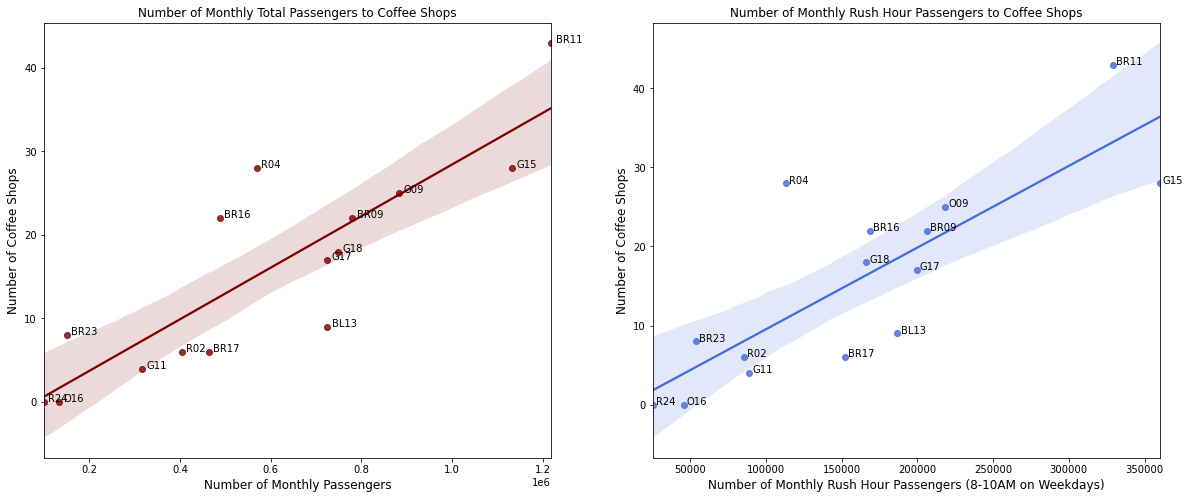

In [41]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 8))

total_passenger_num = MRT_cluster2_geoloc_numbers.total_passenger_num.tolist()
coffee_shop_num = MRT_cluster2_geoloc_numbers.coffee_shop_num.tolist()
Index = MRT_cluster2_geoloc_numbers.index.tolist()
p1 = sns.regplot(x = 'total_passenger_num', y = 'coffee_shop_num', data = MRT_cluster2_geoloc_numbers, ax = ax1, color = 'maroon')
ax1.title.set_text('Number of Monthly Total Passengers to Coffee Shops')
ax1.set_xlabel('Number of Monthly Passengers', size = 12)
ax1.set_ylabel('Number of Coffee Shops', size = 12)
for line in range(0, MRT_cluster2_geoloc_numbers.shape[0]):
    p1.text(total_passenger_num[line]+10000, coffee_shop_num[line], Index[line],
            horizontalalignment='left',size='medium',color='black')

total_passenger_num = MRT_cluster2_geoloc_numbers_rushhours.total_passenger_num.tolist()
coffee_shop_num = MRT_cluster2_geoloc_numbers_rushhours.coffee_shop_num.tolist()
Index = MRT_cluster2_geoloc_numbers_rushhours.index.tolist()
p2 = sns.regplot(x = 'total_passenger_num', y = 'coffee_shop_num', data = MRT_cluster2_geoloc_numbers_rushhours, ax = ax2, color = 'royalblue')
ax2.title.set_text('Number of Monthly Rush Hour Passengers to Coffee Shops')
ax2.set_xlabel('Number of Monthly Rush Hour Passengers (8-10AM on Weekdays)', size = 12)
ax2.set_ylabel('Number of Coffee Shops', size = 12)
for line in range(0, MRT_cluster2_geoloc_numbers_rushhours.shape[0]):
    p2.text(total_passenger_num[line]+2000, coffee_shop_num[line], Index[line],
            horizontalalignment='left',size='medium',color='black')

The only difference between 2 figures is that the left one uses total passengers and the right one uses number of passengers during morning rush hours. We can see that **station BR13 and BL17** stood out in both analysis. The area these 2 stations are in have less coffee shop per passenger compared to other stations in cluster 2.

<h1 align=Left><font size = 3>Conclusion: BL13(Shandao Temple) and BR17(Gangqian) are the best locations for a coffee cart business</font></h1